# Project: Non-Appointment Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project, we will be analyzing the data that collected from 100k medical appointments in Brazil, by focusing on the main question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in the row’s dataset such as (PatientId, AppointmentID, Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show) we will be associate some of them in order to answer these questions: 
*	How many patients, whether they are male or female who show up their appointments? 
*	Did the patients who show up their appointments received a reminder such SMS message? 
*	How old the patients who show up their appointments?  
*   Did the patients who show up their appointments have chronic illness such as hipertension and diabetes and how old are they? 
*	Did the patients who have scholarship and suffer from Alcoholism show up their appointments?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section, we will use 'noshowappointments' data set in order to complete our analysis. First we will import the important libraries such as nump, pandas, and matplotlib as shown below: 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

Then, we will read the file and present at leaset 6 rows to understand the type for each column, and to know the size of the dataset (# of rows and columns). 

In [4]:
df = pd.read_csv('noshowappointments_Dataset.csv')
df.head (6)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   
5  2016-04-29T00:00:00Z   76          REPÚBLICA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No  
5         0           0        0             0      No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

In this dataset, we found 14 cloumns with diffrent data type, and we found apporximatly 110527 records. The describtion of each column is shown below: 

* PatientId: Describe an identity document of the patient usually takes an integer or float values. 

* AppointmentID: Describe id for any appointment to avoid redundency in the rows dataset. PatientId and AppointmentID considred as a primary key for this dataset. 

* Gender: Describe the Gender of the patient wether they are male (M) or female (F). 

* ScheduledDay: Describe the date and time where the patient set up their appointments.  

* AppointmentDay: Describe the date of the appointments.

* Age: Describe the age of the patient usually takes an integer value. 

* Neighbourhood: Indicates the location of the hospital.

* Scholarship: Indicates whether or not the patient is enrolled in Brasilian Welfare program Bolsa Família. 

* Hipertension: It is a flag, says ‘1’ if the patients have a hypertension, and ‘0’ if they did not have a hypertension. 

* Diabetes: It is a flag, says ‘1’ if the patients have diabetes, and ‘0’ if they did not have diabetes. 

* Alcoholism: It is a flag, says ‘1’ if the patients have alcoholism, and ‘0’ if they did not have alcoholism.       
* Handcap: Describe the level of handcap of the patients from (0 till 4), whearse the 0 level means no handcap the patient have. 

* SMS_receive: It is a flag, says ‘1’ if the patients received SMS message, and ‘0’ if they did not received SMS message.  

* No-show: It says ‘No’ if the patients showed up to their appointment, and ‘Yes’ if they did not show up. 

### Data Cleaning (Steps)

In this section, multiple cleaning opertions will be done on the dataset in order to be ready for analysis phase.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 1. Missing Data: 
As we can see from the above description of the dataset, there are no missing value inside the rows, the number of nun-null values for each column were 110527, which indicate for the total number of the rows dataset.

#### 2. Redundency: 
There are no repeated for the rows dataset. We use the following command, which returen 0 value, this means no redundancy for the rows dataset.  

In [8]:
sum(df.duplicated())

0

#### 3. Data Type: 
As we can see from the above description for the dataset (using pd.info() command), there are two columns (ScheduledDay) and (AppointmentDay) have object data type which required to be changed to the DataTime Type. The following command have been used for 'ScheduledDay' column to change it's type: 

In [9]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [10]:
df['ScheduledDay'].head(2)

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In the 'AppointmentDay' column, we faced problem which there is no space between date and time in each row, so, we define a new list called 'new_value' to store the new value of 'AppointmentDay' column after that, we append the last 10 characters using append () command to remove them from each cell. Then, we save the new_value list inside 'AppointmentDay' column. After that, we changed the type of 'AppointmentDay' column to DateTime type. The steps are shown below: 

In [11]:
df['AppointmentDay'].head(2)

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [12]:
new_value = []
for i in df['AppointmentDay']:
         new_value.append(i[:-10])

In [13]:
df['AppointmentDay'] = new_value

In [14]:
df['AppointmentDay'].head(2)

0    2016-04-29
1    2016-04-29
Name: AppointmentDay, dtype: object

In [15]:
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [16]:
df['AppointmentDay'].head(2)

0   2016-04-29
1   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]

#### 4. Drop Columns:
In this dataset, we found some columns which are not important during analysis phase, so we drop them in order to make a clean visulaiztion for the dataset. We dropped (PatientId), (AppointmentID) and (Neighbourhood) from the dataset using the following command below:  

In [17]:
df.drop(['PatientId','AppointmentID','Neighbourhood'] , axis=1, inplace=True)

In [18]:
df.head(2)

Gender              ScheduledDay AppointmentDay  Age  Scholarship  \
0      F 2016-04-29 18:38:08+00:00     2016-04-29   62            0   
1      M 2016-04-29 16:08:27+00:00     2016-04-29   56            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0        0             0      No

#### 5. Drop Rows: 
In this Dataset, we found after present the description of the dataset, age value has -1 and 0 value (during show min value for the 'Age' colmn).Therefore, we skipped these rows and remove them, due to the size of the dataset was more than 100 thouseds records, the huge rows of the dataset will not be effected during analysis phase when removed  two rows from them. We did this step using this expression below:

(Reference: https://hackersandslackers.com/pandas-dataframe-drop


In [19]:
df = df[df.Age != -1]
df = df[df.Age != 0]

In [20]:
df.describe()

Age    Scholarship   Hipertension       Diabetes  \
count  106987.000000  106987.000000  106987.000000  106987.000000   
mean       38.316085       0.101031       0.203772       0.074243   
std        22.466214       0.301371       0.402804       0.262167   
min         1.000000       0.000000       0.000000       0.000000   
25%        19.000000       0.000000       0.000000       0.000000   
50%        38.000000       0.000000       0.000000       0.000000   
75%        56.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          Alcoholism        Handcap   SMS_received  
count  106987.000000  106987.000000  106987.000000  
mean        0.031406       0.022975       0.323264  
std         0.174412       0.164115       0.467725  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000  
max         1.000000       4.000000       1.000000

#### 6. Add a new Column:
In this dataset, we suggest to do a categorization for the age in order to make analysis phase more easier during go through patients age. We used the command below to to divide age into four groups ('Children' , Youth'  ,'Adults' ,'Seniors' ) and save them in a new column called Age_Category 


(Reference: https://datatofish.com/if-condition-in-pandas-dataframe): 

In [21]:
df.loc[(df['Age']>=0) & (df['Age']<=14),'Age_Category']= 'Children' 
df.loc[(df['Age']>=15) & (df['Age']<=24),'Age_Category']= 'Youth' 
df.loc[(df['Age']>=25) & (df['Age']<=64),'Age_Category']= 'Adults' 
df.loc[(df['Age']>=65),'Age_Category']= 'Seniors' 

In [22]:
df['Age'].head(4) ,df['Age_Category'].head(4)

(0    62
 1    56
 2    62
 3     8
 Name: Age, dtype: int64,
 0      Adults
 1      Adults
 2      Adults
 3    Children
 Name: Age_Category, dtype: object)

Also, we want to change the value for the last column (No-show) in order to can add mask for the data, for the patiens how they are attend or not. we use the same command above: 

In [23]:
df.loc[(df['No-show']== 'Yes'), 'Attend_App']= 0
df.loc[(df['No-show']== 'No'), 'Attend_App']= 1

In [24]:
df['Attend_App'].head(4)

0    1.0
1    1.0
2    1.0
3    1.0
Name: Attend_App, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          106987 non-null  object             
 1   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 2   AppointmentDay  106987 non-null  datetime64[ns]     
 3   Age             106987 non-null  int64              
 4   Scholarship     106987 non-null  int64              
 5   Hipertension    106987 non-null  int64              
 6   Diabetes        106987 non-null  int64              
 7   Alcoholism      106987 non-null  int64              
 8   Handcap         106987 non-null  int64              
 9   SMS_received    106987 non-null  int64              
 10  No-show         106987 non-null  object             
 11  Age_Category    106987 non-null  object             
 12  Attend_App      106987 non-null  float64            
dtypes: datetime64[

#### 7. Change column value:
In order to make results when column used during explore dataset in plot figures appeared clearly, we changed the values of 'SMS_received' column from (1, 0) to (Yes, No) using command below, and we save the new value inside a new column called 'SMS_Received'

In [26]:
df.loc[(df['SMS_received']== 1), 'SMS_Received']= 'Yes'
df.loc[(df['SMS_received']== 0), 'SMS_Received']= 'No'

we did the same thing for the value of 'Alcoholism' column, we change the value from (1, 0) to (Yes, No) and save the new value inside a new column known as 'Alcoholism_Status'

In [27]:
df.loc[(df['Alcoholism']== 1), 'Alcoholism_Status']= 'Yes'
df.loc[(df['Alcoholism']== 0), 'Alcoholism_Status']= 'No'

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Gender             106987 non-null  object             
 1   ScheduledDay       106987 non-null  datetime64[ns, UTC]
 2   AppointmentDay     106987 non-null  datetime64[ns]     
 3   Age                106987 non-null  int64              
 4   Scholarship        106987 non-null  int64              
 5   Hipertension       106987 non-null  int64              
 6   Diabetes           106987 non-null  int64              
 7   Alcoholism         106987 non-null  int64              
 8   Handcap            106987 non-null  int64              
 9   SMS_received       106987 non-null  int64              
 10  No-show            106987 non-null  object             
 11  Age_Category       106987 non-null  object             
 12  Attend_App         106987 non-

Now, our data is ready for the next step. 

<a id='eda'></a>
## Exploratory Data Analysis


In this dataset, characteristics about each patient that included in the row’s dataset will be explored in generl. 
By using hist() command (As shown below), we found the most age of the patients who have appointment approximately between 4 years to 65 years old, and most of them attend thier appointments and did not suffer from alcoholism affect. As well, most of them did not suffer from any hipertensions or diabetes. Despite that half of the patients did not received SMS message as reminder for thier appointments and most of them did not have a scholarship, most of them attend thier appointments and they did not suffer from any handcaps. 

In [31]:
df.hist(figsize=(16,16));

In the questions below, we will go deeply in each characteristic to explore and Analyz our dataset. Many questions are mentiond below and  differents figures are drown below to go deeply in analysis phase. 

### 1. How many patients, whether they are male or female who show up their appointments?

First, we did a mask for the value of column 'attend_App' in order to now how many patients whether they are attend appointment, or not. This variable well be used in most our analysis and will be associated with most of the other variables.

In [32]:
attend = df.Attend_App == True
missed = df.Attend_App == False

By using value_counts() command for 'attend' mask, more than 85 thousend (Approx: 79.7%)  of the patients show up thier appointments and approximatly 21 thousend (Approx:20.3%) did not show up thier appointments. 

In [33]:
attend.value_counts()

True     85307
False    21680
Name: Attend_App, dtype: int64

In [35]:
attend.value_counts('%')

True     0.797359
False    0.202641
Name: Attend_App, dtype: float64

As we can see from Figure 1 below, the number of male patients how attend thier appoitnemnt were approximately 29000 while they missed were less than 8000. On the other hand, the number of female patients how attend thier appoitnemnt were approximately more than 55000 while they missed were less than 16000. 

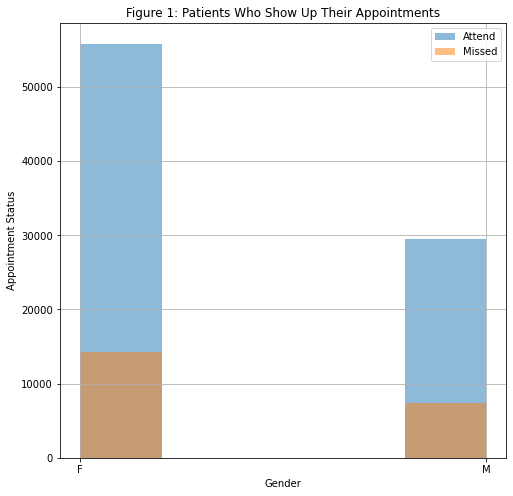

In [36]:
df.Gender[attend].hist(figsize=(8,8) , alpha = 0.5, bins = 5 ,label= 'Attend')
df.Gender[missed].hist(figsize=(8,8) , alpha = 0.5, bins = 5 ,label= 'Missed')
plt.xlabel('Gender')
plt.ylabel('Appointment Status')
plt.title('Figure 1: Patients Who Show Up Their Appointments')
plt.grid(True)
plt.legend()
plt.savefig("test.png")
plt.show()

In [37]:
df.Gender[attend].value_counts(), df.Gender[missed].value_counts()

(F    55843
 M    29464
 Name: Gender, dtype: int64,
 F    14275
 M     7405
 Name: Gender, dtype: int64)

In [38]:
df.Gender[attend].value_counts('%') , df.Gender[missed].value_counts('%')

(F    0.654612
 M    0.345388
 Name: Gender, dtype: float64,
 F    0.658441
 M    0.341559
 Name: Gender, dtype: float64)

### 2. Did the patients who show up their appointments received a reminder such SMS message? 


The number of the patients who received SMS messages were approximately 72402 patients, more than 25 thousends attend thier appointments, as we can see from the Figure 2 below, while more than 9 thousands did not attend. On the other hand, the number of the patients who did not received SMS messages and attend thier appointments were more than 60 thousends, while the patients who did not received SMS messages and did not attend thier appointments were 12 thousends. 

In [39]:
df['SMS_Received'].value_counts()

No     72402
Yes    34585
Name: SMS_Received, dtype: int64

In [40]:
df.SMS_Received[attend].value_counts(), df.SMS_Received[missed].value_counts()

(No     60290
 Yes    25017
 Name: SMS_Received, dtype: int64,
 No     12112
 Yes     9568
 Name: SMS_Received, dtype: int64)

In [41]:
df.SMS_Received[attend].value_counts('%'), df.SMS_Received[missed].value_counts('%')

(No     0.706742
 Yes    0.293258
 Name: SMS_Received, dtype: float64,
 No     0.558672
 Yes    0.441328
 Name: SMS_Received, dtype: float64)

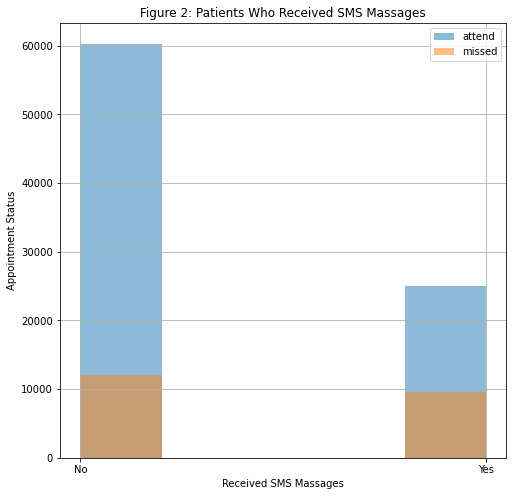

In [42]:
df.SMS_Received[attend].hist(figsize=(8,8) , alpha = 0.5, bins = 5,label= 'attend');
df.SMS_Received[missed].hist(figsize=(8,8) , alpha = 0.5, bins = 5,label = 'missed');
plt.xlabel('Received SMS Massages')
plt.ylabel('Appointment Status')
plt.title('Figure 2: Patients Who Received SMS Massages')
plt.grid(True)
plt.legend()
plt.savefig("test.png")
plt.show()


### 3. How many patients based on thier ages who show up their appointments? 

Based on the Age_Category column, we will explore the age of the patients whether they are attend or not attned thier appointments. As we can see from Figre 3 below, the numebr of children patients where those ages between (one and fourteen years old) who attend their appointments were approximately more than 15 thouseds, while they are not attend were less than 5 thouseds. The nmuber of youth patients where those ages between (fifteen and twenty four years old) who attend their appointments were approximately more than 10 thouseds, while they were not attend were less than 4 thouseds. On the other hand, the number of adults where those ages between (twenty five and sixty four years old) who attend their appointments were approximately more than 47 thouseds, while they were not attend were less than 12 thouseds. The number of seniors patients where those ages between (more than sixty four years old) who attend their appointments were approximately more than  10 thouseds, while they were not attend were less than 2500 . 

In [43]:
df.Age_Category.value_counts()

Adults      58857
Children    19718
Seniors     14402
Youth       14010
Name: Age_Category, dtype: int64

In [44]:
df.Age_Category[attend].value_counts(), df.Age_Category[missed].value_counts()

(Adults      47237
 Children    15431
 Seniors     12169
 Youth       10470
 Name: Age_Category, dtype: int64,
 Adults      11620
 Children     4287
 Youth        3540
 Seniors      2233
 Name: Age_Category, dtype: int64)

In [45]:
df.Age_Category[attend].value_counts('%'), df.Age_Category[missed].value_counts('%')

(Adults      0.553729
 Children    0.180888
 Seniors     0.142649
 Youth       0.122733
 Name: Age_Category, dtype: float64,
 Adults      0.535978
 Children    0.197740
 Youth       0.163284
 Seniors     0.102998
 Name: Age_Category, dtype: float64)

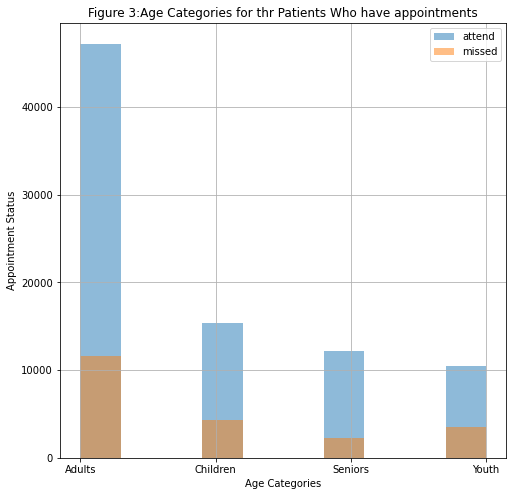

In [46]:
df.Age_Category[attend].hist(figsize=(8,8) , alpha = 0.5, bins = 10 ,label= 'attend');
df.Age_Category[missed].hist(figsize=(8,8) , alpha = 0.5, bins = 10 ,label = 'missed');
plt.xlabel('Age Categories')
plt.ylabel('Appointment Status')
plt.title('Figure 3:Age Categories for thr Patients Who have appointments')
plt.grid(True)
plt.legend()
plt.savefig("test.png")
plt.show()

### 4. Did the patients who show up their appointments have chronic illness such as hipertension and diabetes and how old are they?

As we can see from Figure 4 and Figure 5, most of the patients who attend thier appointments and suffer from chronic illness such as hipertension and diabetes were appeared by a high rate in adults and seniors patients, consecutively, hipertension appeared with 59% in adults and 39% in seniors, while diabetes appeared with 56% in adults and 42% in seniors. 

In [47]:
df['Age_Category'].value_counts()

Adults      58857
Children    19718
Seniors     14402
Youth       14010
Name: Age_Category, dtype: int64

In [48]:
df['Age_Category'][attend].value_counts()

Adults      47237
Children    15431
Seniors     12169
Youth       10470
Name: Age_Category, dtype: int64

In [49]:
df['Age_Category'][attend].value_counts('%')

Adults      0.553729
Children    0.180888
Seniors     0.142649
Youth       0.122733
Name: Age_Category, dtype: float64

In [50]:
df.query('Hipertension == 1 ')[attend]['Age_Category'].value_counts()

<ipython-input-50-44a06d7ab38d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Hipertension == 1 ')[attend]['Age_Category'].value_counts()


Adults      10792
Seniors      7167
Youth          58
Children       12
Name: Age_Category, dtype: int64

In [51]:
df.query('Hipertension == 1 ')[attend]['Age_Category'].value_counts('%')

<ipython-input-51-146d1a473e6c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Hipertension == 1 ')[attend]['Age_Category'].value_counts('%')


Adults      0.598591
Seniors     0.397526
Youth       0.003217
Children    0.000666
Name: Age_Category, dtype: float64

In [52]:
df.query('Diabetes == 1 ')['Age_Category'].value_counts()

Adults      4489
Seniors     3363
Youth         72
Children      19
Name: Age_Category, dtype: int64

In [53]:
df.query('Diabetes == 1 ')[attend]['Age_Category'].value_counts()

<ipython-input-53-dc3ad88bd16a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Diabetes == 1 ')[attend]['Age_Category'].value_counts()


Adults      3664
Seniors     2786
Youth         49
Children      14
Name: Age_Category, dtype: int64

In [54]:
df.query('Diabetes == 1 ')[attend]['Age_Category'].value_counts('%')

<ipython-input-54-e389a0d587a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Diabetes == 1 ')[attend]['Age_Category'].value_counts('%')


Adults      0.562567
Seniors     0.427760
Youth       0.007523
Children    0.002150
Name: Age_Category, dtype: float64

<ipython-input-55-e8c603625e16>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt1 = df.query('Hipertension == 1')[attend]['Age_Category'].value_counts('%').plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'red', label = 'Hipertension');
<ipython-input-55-e8c603625e16>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt2 = df.query('Diabetes == 1')[attend]['Age_Category'].value_counts('%').plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Diabetes');


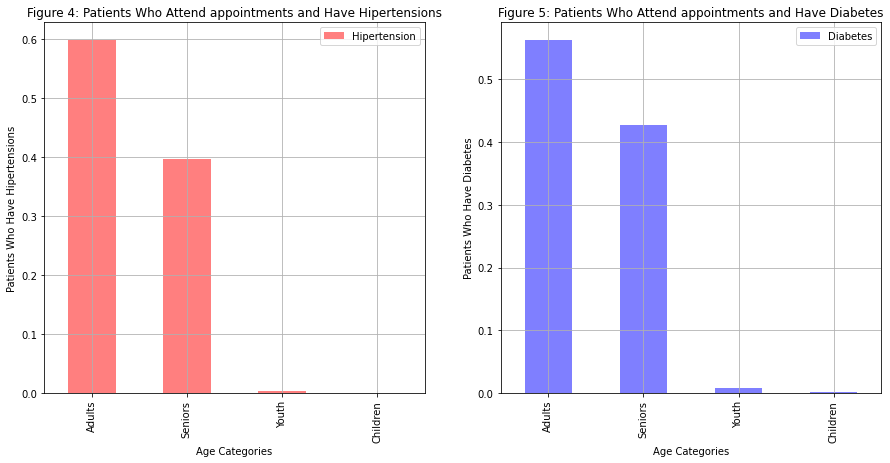

In [55]:
fig = plt.figure()

fig.add_subplot(221)   #top left
plt1 = df.query('Hipertension == 1')[attend]['Age_Category'].value_counts('%').plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'red', label = 'Hipertension');
plt.xlabel('Age Categories')
plt.ylabel('Patients Who Have Hipertensions')
plt.title('Figure 4: Patients Who Attend appointments and Have Hipertensions')
plt.grid(True)
plt.legend()
plt.savefig("test4.png")


fig.add_subplot(222)  #top right
plt2 = df.query('Diabetes == 1')[attend]['Age_Category'].value_counts('%').plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Diabetes');
plt.xlabel('Age Categories')
plt.ylabel('Patients Who Have Diabetes')
plt.title('Figure 5: Patients Who Attend appointments and Have Diabetes')
plt.grid(True)
plt.legend()
plt.savefig("test5.png")



We found this link reference: https://stackoverflow.com/questions/37472398/how-to-aggregate-plots-into-figure-with-subplots to prepared multiple plots as figure with subplots 
            

### Did the patients who have scholarship and suffer from Alcoholism show up their appointments?

In this section, we will foucs on the patients who attend or missed thier appointments, and weather they have a scholership or not, and whether they have suffered from alcoholism or not. Based on the subplots below, in figure 6, the number of the attend patients and who have a acholership, and suffered from alcoholism were approximately less than 4 thousands patients, however,the number of who did not suffered from alcoholism were approximately 7800 patients. 

On the other side, in figure 7, we found that,the number of the attend patients who did not a acholership but suffered from alcoholism were approximately less than 2500 patients, however,who did not suffered from alcoholism were approximately more than 74 thousands patients.

In figure 8,the number of the missed patients and who have a acholership, and suffered from alcoholism were approximately less than 2 hundreds patients, however,the number of who did not suffered from alcoholism were approximately less than 2500 patients. 

In figure 9, we found that, the number of the missed patients and who did not have a acholership, and suffered from alcoholism were approximately less than 6 hundreds patients, however,the number of who did not suffered from alcoholism were approximately less than 19 thousands patients.

In [56]:
df.query('Scholarship == 1 ')[attend]['Alcoholism_Status'].value_counts()

<ipython-input-56-93a5331bbfca>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Scholarship == 1 ')[attend]['Alcoholism_Status'].value_counts()


No     7859
Yes     379
Name: Alcoholism_Status, dtype: int64

In [57]:
df.query('Scholarship == 0 ')[attend]['Alcoholism_Status'].value_counts()

<ipython-input-57-fd7c716da628>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Scholarship == 0 ')[attend]['Alcoholism_Status'].value_counts()


No     74765
Yes     2304
Name: Alcoholism_Status, dtype: int64

In [58]:
df.query('Scholarship == 1 ')[missed]['Alcoholism_Status'].value_counts()

<ipython-input-58-8d4c6f3c07e4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Scholarship == 1 ')[missed]['Alcoholism_Status'].value_counts()


No     2422
Yes     149
Name: Alcoholism_Status, dtype: int64

In [60]:
df.query('Scholarship == 0 ')[missed]['Alcoholism_Status'].value_counts()

<ipython-input-60-926d41017508>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.query('Scholarship == 0 ')[missed]['Alcoholism_Status'].value_counts()


No     18581
Yes      528
Name: Alcoholism_Status, dtype: int64

In [62]:
fig = plt.figure()

fig.add_subplot(221)   #top left
plt1 = df.query('Scholarship == 1')[attend]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Hipertension');
plt.xlabel('Alcoholism Status')
plt.ylabel('Patients Who Have Scholarship')
plt.title('Figure 6: Alcoholism Status for Attend Patients And Have Scholarship')
plt.grid(True)
plt.legend()
plt.savefig("test10.png")


fig.add_subplot(222)  #top right
plt2 = df.query('Scholarship == 0 ')[attend]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Diabetes');
plt.xlabel('Alcoholism Status')
plt.ylabel('Patients Who Did Not Have Scholarship')
plt.title('Figure 7: Alcoholism Status for Attend Patients And Did Not Have Scholarship')
plt.grid(True)
plt.legend()
plt.savefig("test11.png")

fig.add_subplot(223)   #Bottom left
plt3 = df.query('Scholarship == 1 ')[missed]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'red', label = 'Hipertension');
plt.xlabel('Alcoholism Status')
plt.ylabel('Patients Who Have Hipertensions')
plt.title('Figure 8: Alcoholism Status for Missed Patients and Have Scholarship')
plt.grid(True)
plt.legend()
plt.savefig("test12.png")


fig.add_subplot(224)   #Bottom right
plt4 = df.query('Scholarship == 0 ')[missed]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'red', label = 'Hipertension');
plt.xlabel('Alcoholism Status')
plt.ylabel('Patients Who Have Scholarship')
plt.title('Figure 9: Alcoholism Status for Missed Patients and Did Not Have Scholarship')
plt.grid(True)
plt.legend()
plt.savefig("test13.png")



<ipython-input-62-56e637d67cc3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt1 = df.query('Scholarship == 1')[attend]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Hipertension');
<ipython-input-62-56e637d67cc3>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt2 = df.query('Scholarship == 0 ')[attend]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'blue', label = 'Diabetes');
<ipython-input-62-56e637d67cc3>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt3 = df.query('Scholarship == 1 ')[missed]['Alcoholism_Status'].value_counts().plot(kind ='bar',alpha=0.5,figsize=(15,15), color = 'red', label = 'Hipertension');
<ipython-input-62-56e637d67cc3>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt4 = df.query('Scholarship == 0 ')[missed]['Alcohol

<a id='conclusions'></a>
## Conclusions

In the noshowappointments dataset, we analysed characteristics of the patients, and we conclude that. Firstly, eighty five thousand patients (Approx: 79.7%) show up thier appointments, approximately fifty five thousand patients were female while approximately twenty nine thousand patients were male, almost twinty five thousand patients received SMS messages as reminder.

Based on the age category for the attend patients were approximately fifteen thoused patients were children, ten thoused patients were youth, fourty seven thoused patients were Adults, and twelve thoused patients were seniors, most chronic illness such as hipertension and diabetes were appeared by a high rate in adults and seniors attend patients, consecutively, hipertension appeared with 59% in adults and 39% in seniors, while diabetes appeared with 56% in adults and 42% in seniors. 

Despite that, the number of the attend patients and who have a acholership and suffered from alcoholism were approximately less than 4 thousands patients, however,the number of who did not suffered from alcoholism were approximately 7800 patients.

In addition, the number of the attend patients who did not a acholership but suffered from alcoholism were approximately less than 2500 patients, however,who did not suffered from alcoholism were approximately more than 74 thousands patients.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])